# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from sklearn import model_selection, metrics
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold, cross_val_score

# Import library for preparing data
from sklearn.model_selection import train_test_split

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the healthcare dataset file
data = pd.read_csv("/content/drive/MyDrive/Collab notebooks/Elective Project/Boston.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Checking the content of the first 5 rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
# Checking number of rows and columns of the data
data.shape

(506, 13)

In [ ]:
# Checking the info of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**

- All columns are of **numeric data type**.
- The number of non-null values is the same as the total number of entries in the data, i.e., **there are no null values.**


In [ ]:
# Checking for duplicate values in the data
data.duplicated().sum()

0

**Observations:**

- **There are no duplicate values.**


In [ ]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

**Observations:**

- **There are no missing values.**

In [ ]:
# Checking the descriptive statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**

- All columns are of **numeric data type**.
- The number of non-null values is the same as the total number of entries in the data, i.e., **there are no null values.**


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, title = ""):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )
    f2.suptitle(title)
                    # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )

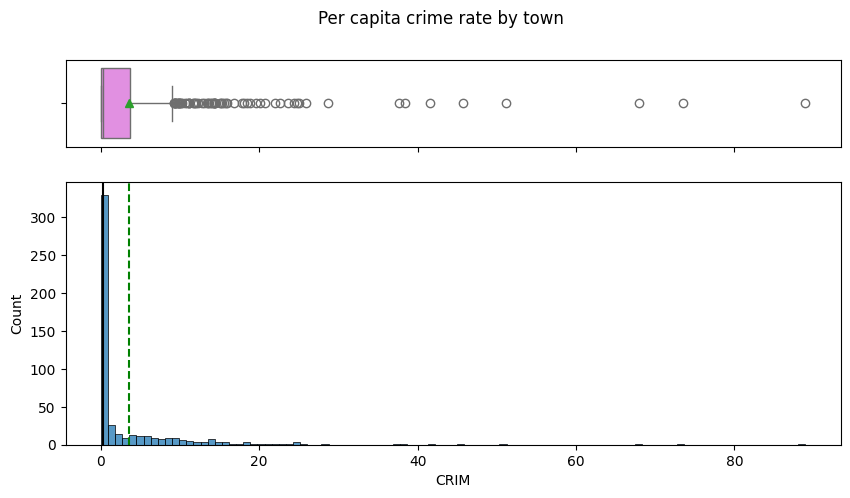

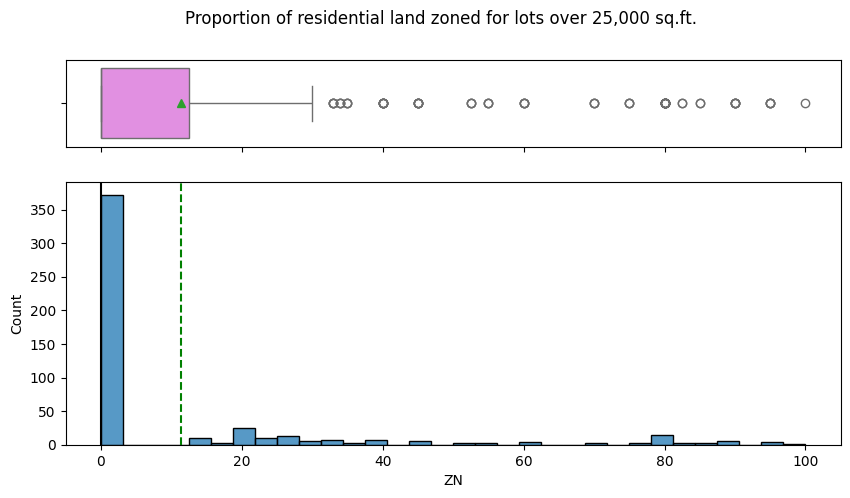

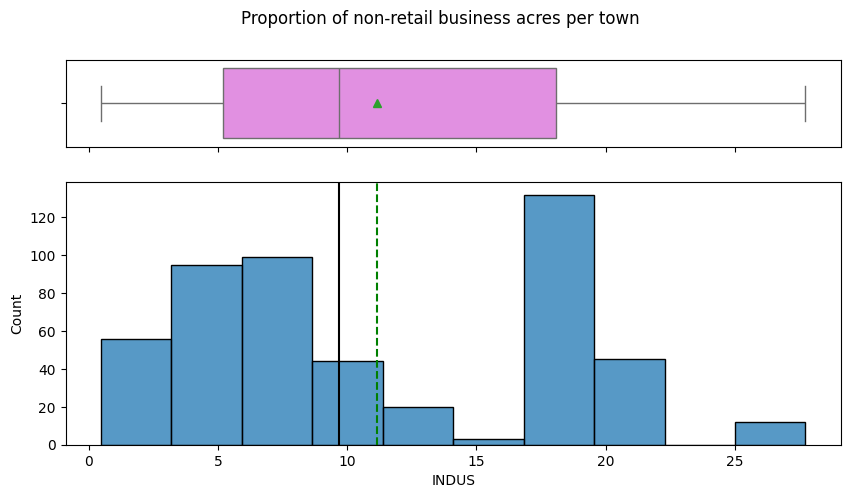

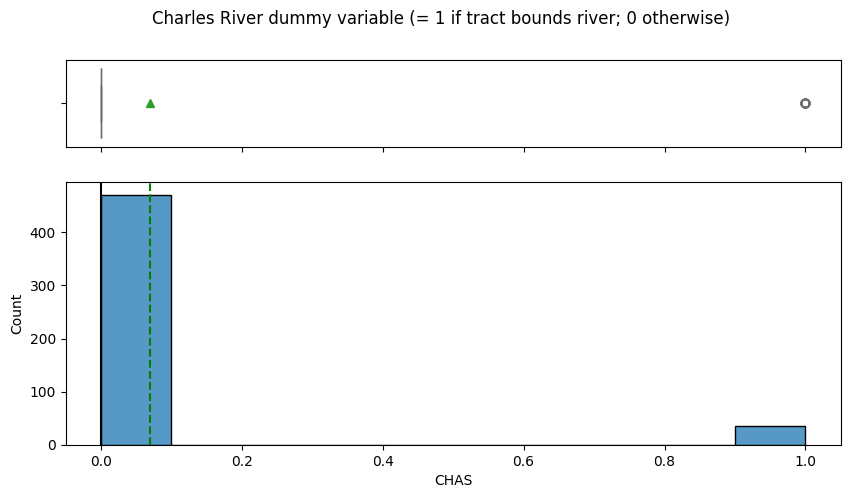

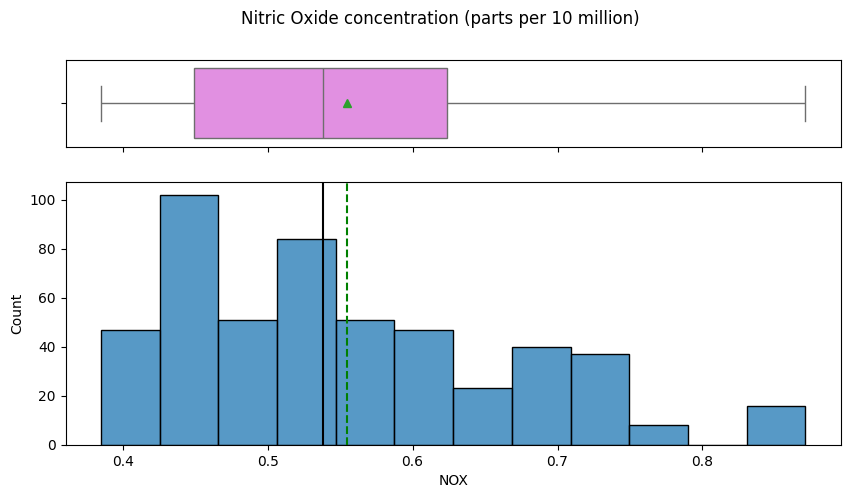

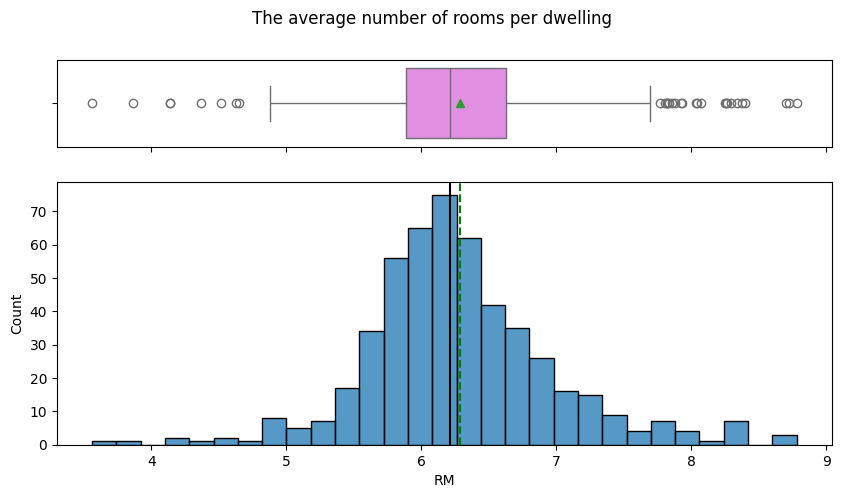

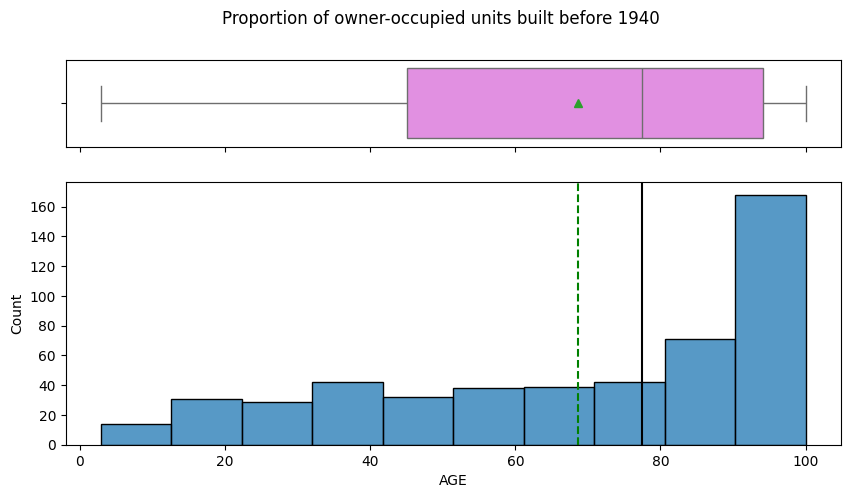

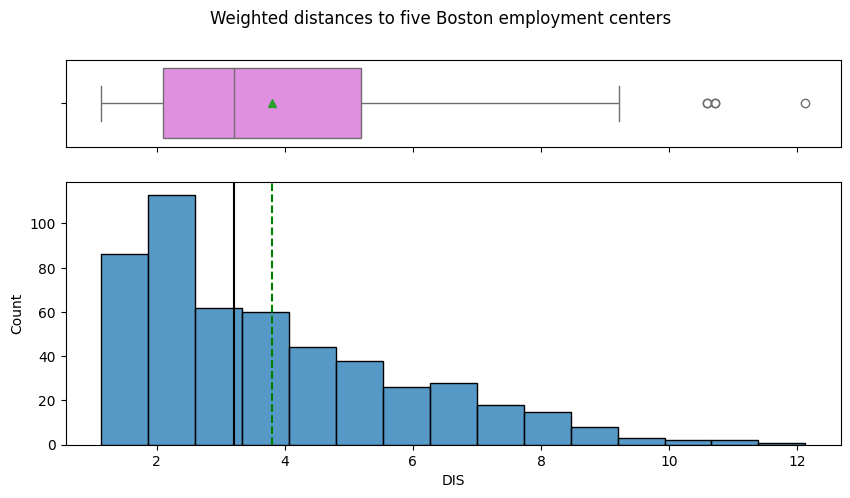

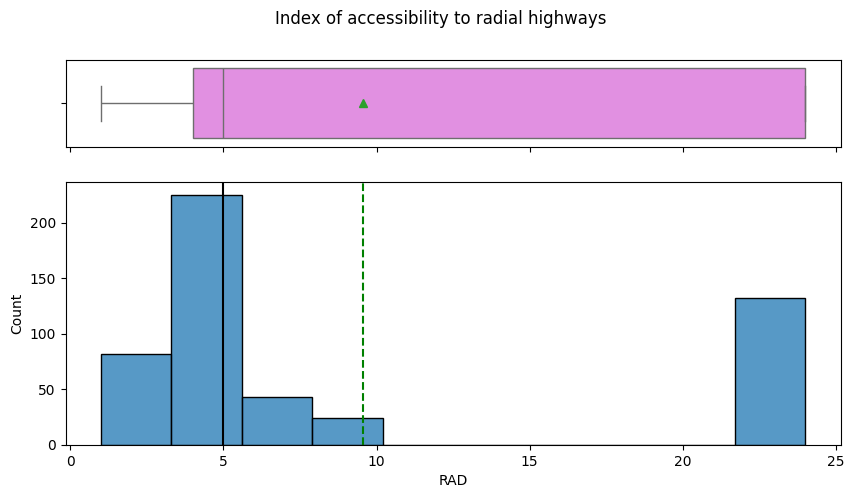

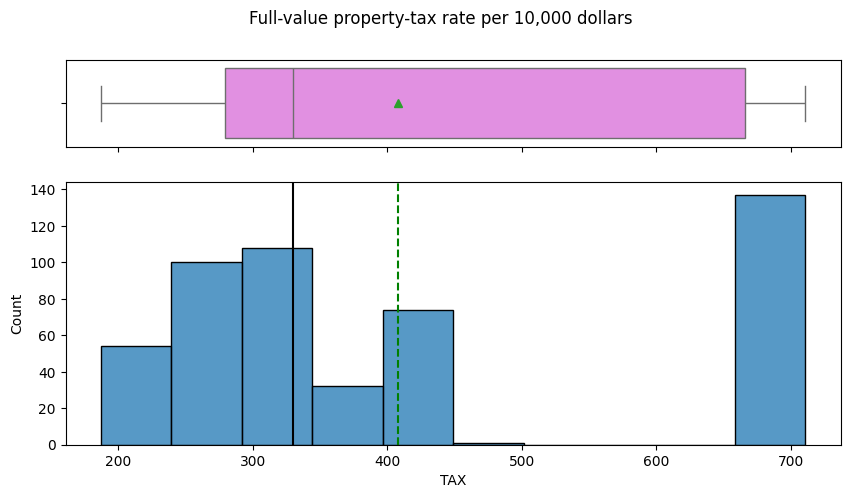

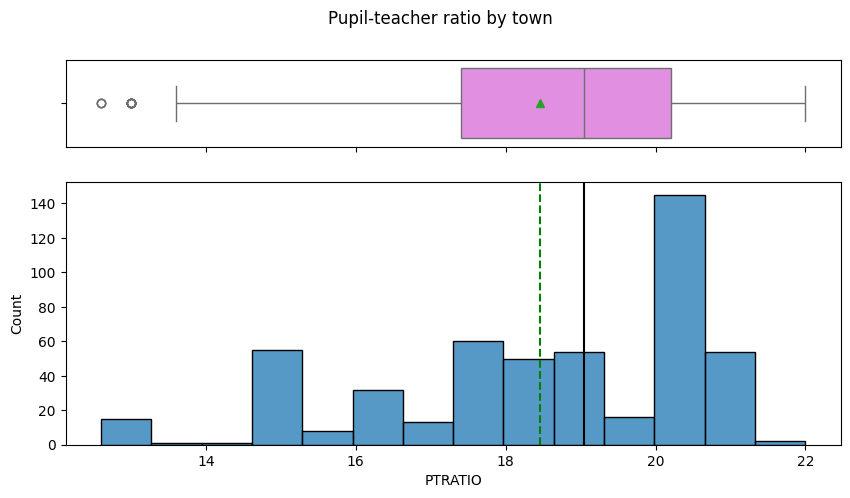

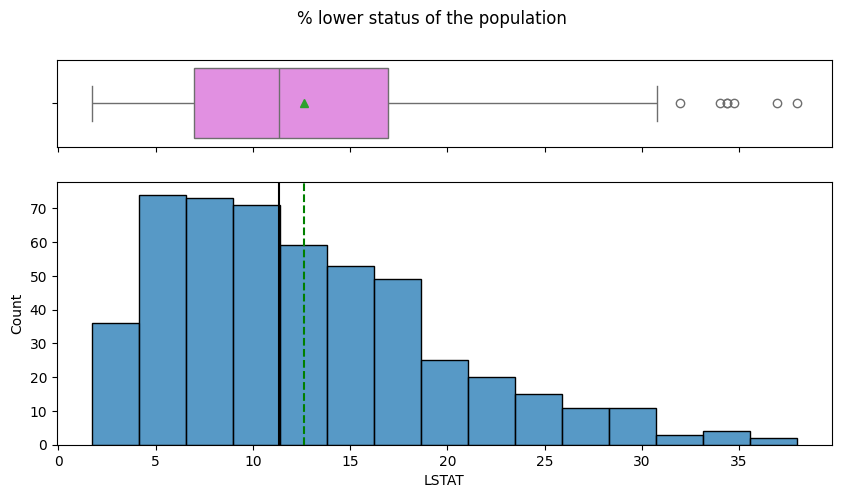

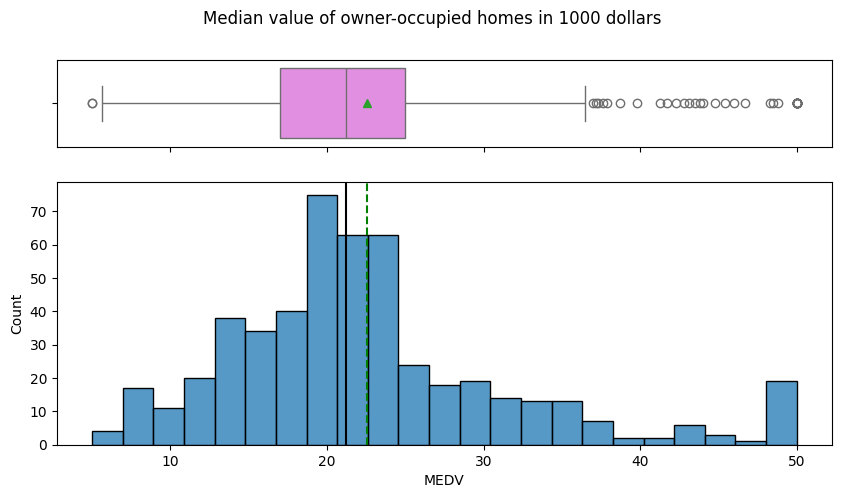

In [ ]:
# Check variable distributions
#Dictionary of variavles
dic_vars =   {
    "CRIM": "Per capita crime rate by town",
    "ZN": "Proportion of residential land zoned for lots over 25,000 sq.ft.",
    "INDUS": "Proportion of non-retail business acres per town",
    "CHAS": "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
    "NOX": "Nitric Oxide concentration (parts per 10 million)",
    "RM": "The average number of rooms per dwelling",
    "AGE": "Proportion of owner-occupied units built before 1940",
    "DIS": "Weighted distances to five Boston employment centers",
    "RAD": "Index of accessibility to radial highways",
    "TAX": "Full-value property-tax rate per 10,000 dollars",
    "PTRATIO": "Pupil-teacher ratio by town",
    "LSTAT": "% lower status of the population",
    "MEDV": "Median value of owner-occupied homes in 1000 dollars"
    }
for i in dic_vars:
  histogram_boxplot(data, i, figsize=(10, 5), kde=False, bins=None, title = dic_vars[i])

**Observations:**

- **MEDV** is the variable we are trying to predict — the median value of owner-occupied homes in $1000s

- The peak of the distribution shows that most of MEDV around $18000s-26000s.

- There are more Owner-occupied homes with price around $50k than others which have value above 30k



## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

- As the **MEDV** is not really a normal distribution, so we use log transformation on the 'MEDV' column and check the distribution of the transformed column

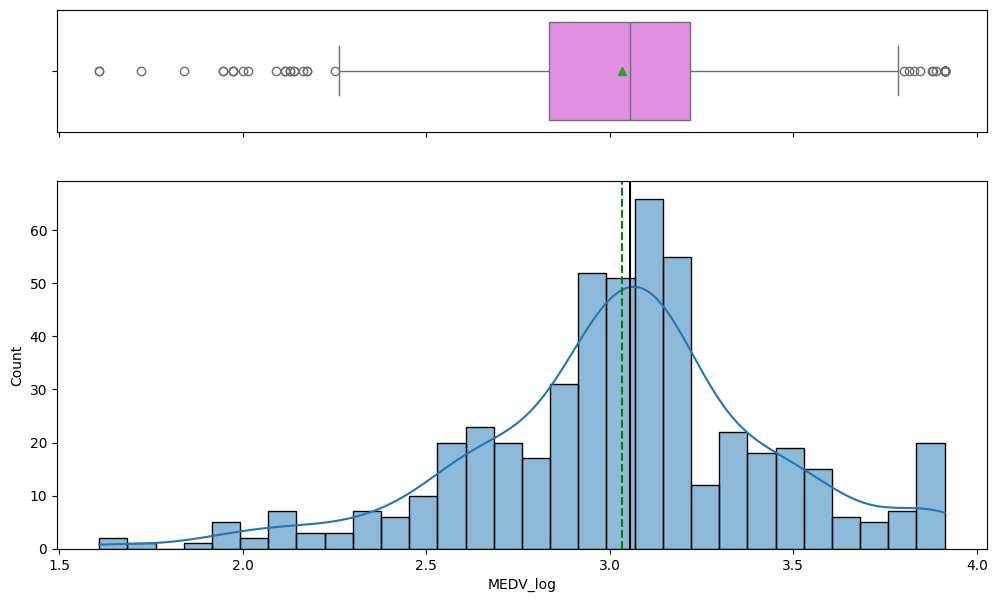

In [ ]:
data['MEDV_log'] = np.log(data['MEDV'])
histogram_boxplot(data, "MEDV_log", kde = True, bins = 30)

In [ ]:
# We dont need the column MEDV anymore, so drop MEDV
df= data.drop('MEDV', axis = 1)


In [ ]:
#Update dic_vars MEDV_log
dic_vars['MEDV_log'] = dic_vars['MEDV']
del dic_vars['MEDV']
print (dic_vars)

{'CRIM': 'Per capita crime rate by town', 'ZN': 'Proportion of residential land zoned for lots over 25,000 sq.ft.', 'INDUS': 'Proportion of non-retail business acres per town', 'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)', 'NOX': 'Nitric Oxide concentration (parts per 10 million)', 'RM': 'The average number of rooms per dwelling', 'AGE': 'Proportion of owner-occupied units built before 1940', 'DIS': 'Weighted distances to five Boston employment centers', 'RAD': 'Index of accessibility to radial highways', 'TAX': 'Full-value property-tax rate per 10,000 dollars', 'PTRATIO': 'Pupil-teacher ratio by town', 'LSTAT': '% lower status of the population', 'MEDV_log': 'Median value of owner-occupied homes in 1000 dollars'}


**Binary Analysis**

<Axes: >

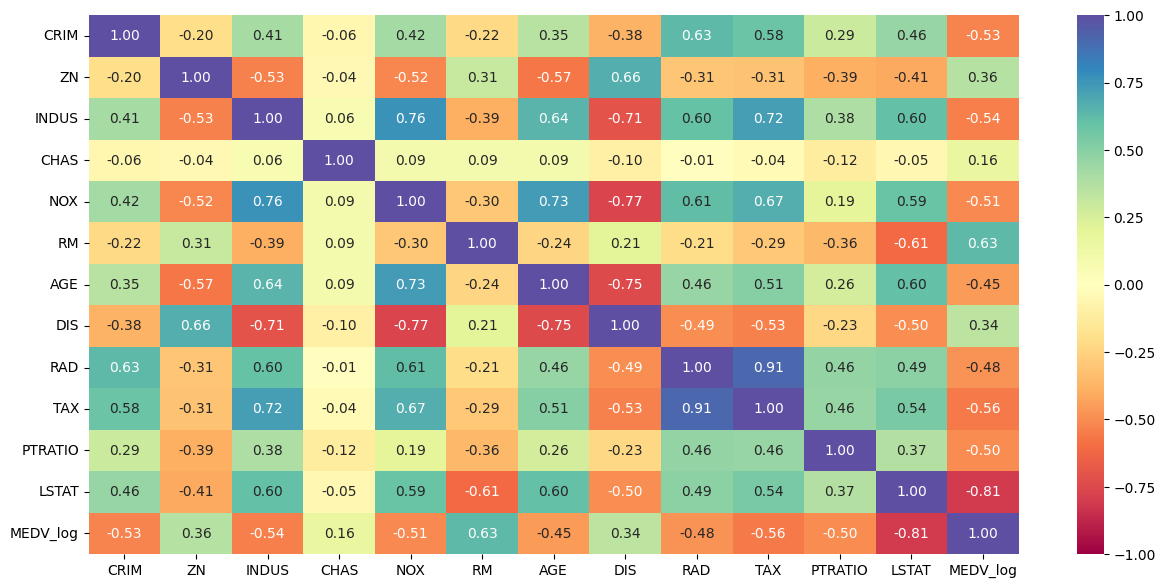

In [ ]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

**Observation**
- The heatmap shows that the weighted distances (**DIS**) to five Boston employment centers is highly correlated with  nitric oxides concentration (**NOX**), proportion of non-retail business acres per town (**INDUS**)and proportion of owner-occupied units built prior to 1940 (**AGE**)
- The price **MEDV** is also correlated with  % lower status of the population which means the owner-occupied unit prices of high population areas are higher than other areas  
 - The price **MEDV** is also correlated with  number of rooms (RM)
-**TAX** is also correlated with proportion of non-retail business acres per town(**INDUS**) and index of accessibility to radial highways (**RAD**)



**Relationship between the features having significant corrlelations**

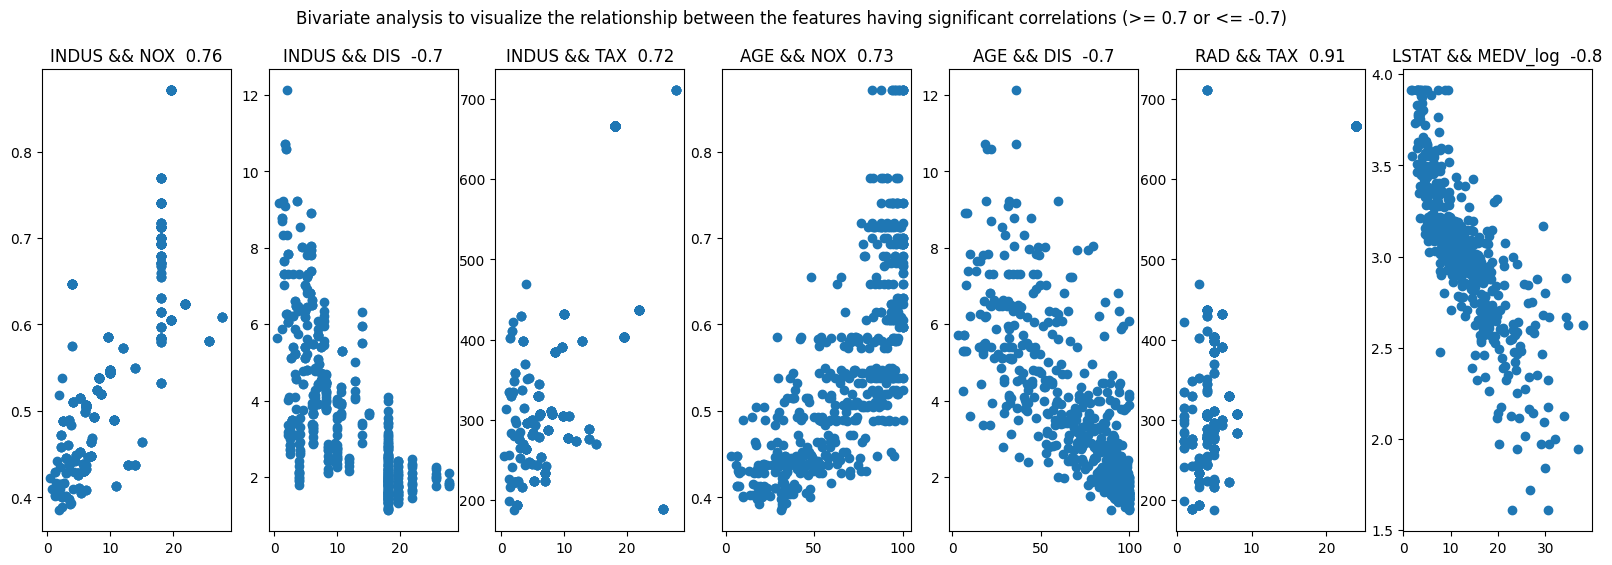

In [ ]:
c= df.corr()
fig, axes = plt.subplots(1, 7, figsize = (20, 6))
fig.suptitle('Bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)')
i= 0
ylist =[]
for xvar in dic_vars:
    for yvar in dic_vars:
        if ((xvar != yvar) and (xvar not in ylist) and ((c.loc[xvar][yvar] >= 0.7) or  (c.loc[xvar][yvar] <= -0.7)) ):
          ylist.append(yvar)
          #show scatter plot of correlation values
          axes[i].scatter(x = df[xvar] , y = df[yvar])
          axes[i].set_title( xvar + ' && ' + yvar + '  ' + str(c.loc[xvar][yvar])[:4] )
          i += 1


**Observation**

From the scatter plot between the variables:

- AGE && DIS has a negative correlation between them, it means that the houses near centers may older than other areas.
- There are a high a correlation between RAD and TAX but we haven't seen the trend  so it might be due to outliers.
- MEDV_log and LSTAT, it is clear that there is a negative correlation between them. It means that the house tends to increase with a decease in LSTAT. The house price may be lower in areas where lower status people live.


> Bi-variate scatter for all numerical variables with the dependent variable **MEDV_log**




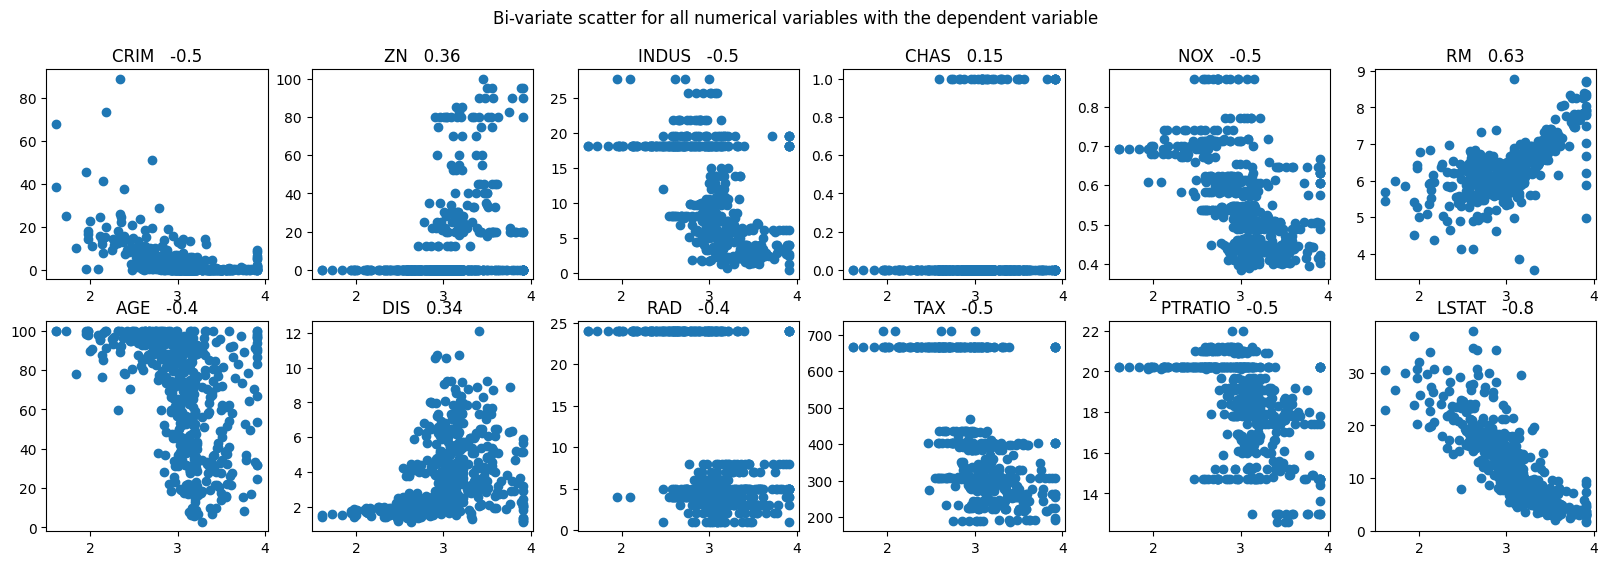

In [ ]:
fig, axes = plt.subplots(2, 6, figsize = (20, 6))
fig.suptitle('Bi-variate scatter for all numerical variables with the dependent variable')
#show scarter plot of correlation values
i= 0
for var in dic_vars:
  if (var != 'MEDV_log'):
    if (i<6):
      axes[0,i].scatter(x = df.MEDV_log , y = df[var])
      axes[0,i].set_title(var +'   ' + str(c.loc['MEDV_log'][var])[:4])
    elif (i<12):
      axes[1,i-6].scatter(x = df.MEDV_log , y = df[var])
      axes[1,i-6].set_title(var  +'   '+  str(c.loc['MEDV_log'][var])[:4])
    i += 1



**Observation**

From the scatter plot between the variables:
 - MEDV_log and LSTAT, it is clear that there is a negative correlation between them
 -MEDV_log and RM, there is a positive correlation between them which means the unit owner prices depends on the number of rooms
 -MED_log and CRIM, there is negative correlation between them which means the prices are higher where are low crime rates. However, the correlation = -0.5, it may not impact to the price.
 -MED_log and DIS, there is positive correlation between them which means the prices   may depend on the weighted distances to five Boston employment centers. However, the correlation = 0.34 so it doesn't impact to the price.
 - Other scatters show the data are completely random and there are no strong relationships between MEDV_log and "ZN", "INDUS", "CHAS","NOX","AGE, "RAD", "TAX","PTRATIO"

## Model Building - Linear Regression

In [ ]:
# Separate the dependent variable and indepedent variables

X = df.drop('MEDV_log', axis = 1)
Y = df['MEDV_log']


# Add the intercept term
X = sm.add_constant(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)


**Training model**


In [ ]:
#Training model
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.intercept_


4.68559762613719

In [ ]:
# get coeficients and their respective feature names
coef_series = pd.Series(
  data=lm.coef_,
  index=lm.feature_names_in_
)

print('Model coefficients with column names :', coef_series)

Model coefficients with column names : const      0.000000
CRIM      -0.012888
ZN         0.001638
INDUS      0.003209
CHAS       0.102782
NOX       -1.014130
RM         0.050859
AGE        0.000340
DIS       -0.052310
RAD        0.015292
TAX       -0.000546
PTRATIO   -0.042743
LSTAT     -0.029916
dtype: float64


## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

**How does the model is performing? Check using Rsquared, RSME, MAE, MAPE**

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Performance on train data: ")
lm_performance = model_performance_regression(lm, X_train, y_train)
lm_performance

Performance on train data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.192713,0.140133,0.773772,0.765123,4.864376


In [ ]:
print("Performance on test data: ")
lm_test_performance = model_performance_regression(lm, X_test, y_test)
lm_test_performance

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.191963,0.143914,0.786246,0.76611,5.004389


In [ ]:
scoring = 'neg_mean_squared_error'
kfold = model_selection.KFold(n_splits=10)
cv_scores = model_selection.cross_val_score(lm, X_train, y_train, cv=kfold, scoring=scoring)
print("Cross Validation Scores: ", cv_scores)
print("Average Cross Validation Score: ",np.abs(np.mean(cv_scores)))

Cross Validation Scores:  [-0.02300595 -0.05629573 -0.03430323 -0.05495414 -0.0309666  -0.05102752
 -0.04104981 -0.04054672 -0.04919801 -0.02368553]
Average Cross Validation Score:  0.04050332479219725


**Is there multicollinearity? Check using VIF**

In [ ]:
def check_VIF (train_df):
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = train_df.columns

  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(train_df.values, i)
                            for i in range(len(train_df.columns))]

  return vif_data

print(check_VIF(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


As we can see, TAX and RAID have very high values of VIF, indicating that these two variables are highly correlated. This is expected as TAX does influence RAD. Hence, considering these two features together leads to a model with high multicollinearity. For this reason, we remove TAX and recalculate the VIF.

In [ ]:
X_train = X_train.drop('TAX', axis = 1)
print(check_VIF(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


As we see above, the VIF is less than 5 for all the independent variables, so the multicollinearity has been removed between the variables. So, we retrain the model.

In [ ]:
# Create the model
# performing the regression
# and fitting the model
model = sm.OLS(y_train, X_train).fit()

# printing the summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          1.40e-101
Time:                        02:33:58   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

Following the above results, we found that the regression coefficients corresponding to ZN, INDUS and AGE are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [ ]:
X1 = df.drop(['MEDV_log', 'TAX', 'ZN', 'INDUS', 'AGE'] , axis = 1)
Y1 = df['MEDV_log']


In [ ]:
# Add the intercept term
X1 = sm.add_constant(X1)

# Splitting the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 1)

In [ ]:
# Create the model
# performing the regression
# and fitting the model
model1 = sm.OLS(y1_train, X1_train).fit()

# printing the summary table
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          2.61e-104
Time:                        02:33:58   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

In [ ]:
model1_performance = model_performance_regression(model1, X1_train, y1_train)
model1_performance

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.195504,0.143686,0.767174,0.761082,4.981813


In [ ]:
print("Performance on test data: ")
model1_test_performance = model_performance_regression(model1, X1_test, y1_test)
model1_test_performance

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.198045,0.151284,0.772486,0.758066,5.257965


**Observations:**
-  RMSE, MAE, and MAPE of train and test data are very close, indicating that the model is not overfitting and has generalized well over the unseen data.

- The adjusted R2 of ~0.76 implies that the independent variables are able to explain ~76% variance in the target variable.

- Mean Absolute Percentage Error is ~5.2% on the test data, indicating that the average difference between the predicted value and the actual value is ~5%.
- The p-values for the independent variables are less than 0.05 in our final model, indicating that they are statistically significant toward  price prediction.

**How does the model is performing after cross validation?**

In [ ]:
# Build the regression model and cross-validate
linearregression = LinearRegression()

scoring = 'neg_mean_squared_error'
kfold = model_selection.KFold(n_splits=10)
cv_Score11 = cross_val_score(linearregression, X1_train, y1_train, cv = kfold)
cv_Score12 = cross_val_score(linearregression, X1_train, y1_train, cv = kfold, scoring= scoring)


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


**Observations**

The Mean Square Errors is close to 0, so the model is already at peak performance, did not improve.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.
- If the assumptions of model are not satisfied, then the model might give false results. Hence, if any of the assumptions is not true, then we will rebuild the model after fixing those issues.

1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No Heteroscedasticity

**1. Mean of residuals should be 0**

In [ ]:
# Residuals

residual = model1.resid
residual.mean()

-2.5303049047106675e-15

-  The mean of residuals is very close to 0. Hence, the corresponding assumption
is satisfied.

**2. Normality of error terms**

<Axes: ylabel='Count'>

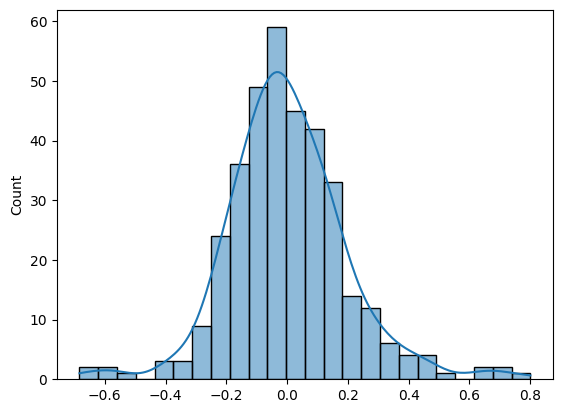

In [ ]:
# Plot histogram of residuals
sns.histplot(residual, kde=True)

- The residuals have a close to normal distribution. The assumption of normality is satisfied.

**3. Linearity**

There is a linear relationship between the independent and dependent variables.

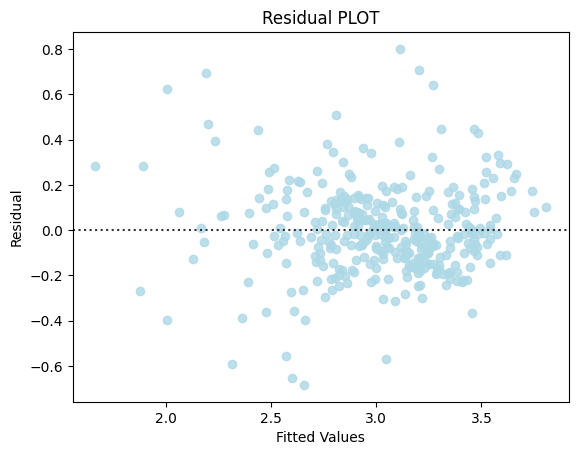

In [ ]:
# Predicted values
fitted = model1.fittedvalues
# Plotting Residuals VS Fitted Values
sns.residplot(x = fitted, y = residual, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

We can observe that there is no pattern in the residuals vs fitted values scatter plot, i.e., the linearity assumption is satisfied.

**4. No Heteroscedasticity**

We will use Goldfeld–Quandt test to check homoscedasticity:

- Null hypothesis: Residuals are homoscedastic

- Alternate hypothesis: Residuals are hetroscedastic

- Alpha = 0.05

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X1_train)
lzip(name, test)

[('F statistic', 1.0835082923425288), ('p-value', 0.30190120067668275)]

 - As we can observe from the above test, the p-value is greater than 0.05. So, we fail to reject the null-hypothesis, i.e., residuals are homoscedastic.



**Observation**
- All the assumptions for the linear regression model are satisfied. With our model's adjusted R-squared value of around 0.76, we can capture 76% of the variation in the data.
- The p-values for the independent variables are less than 0.05 in our final model, indicating that they are statistically significant toward price prediction.

 Now, let's check and interpret the coefficients of the model.

In [ ]:
coef = model1.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


## Final Model



In [ ]:
# Let us write the equation of the fit

Equation = "log (Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) = 	( 4.649385823266634 ) *  const + ( -0.012500455079103785 ) *  CRIM + ( 0.11977319077019677 ) *  CHAS + ( -1.056225351668325 ) *  NOX + ( 0.05890657510928028 ) *  RM + ( -0.04406889079940611 ) *  DIS + ( 0.007848474606243312 ) *  RAD + ( -0.048503620794998564 ) *  PTRATIO + ( -0.029277040479796717 ) *  LSTAT + 

**Observation**
From the above equation, it shows that  the features has great impact on predicting the price are: CRIM, CHAS, NOX, RM, DIS

## Actionable Insights and Recommendations

Actionable Insights:

•	The project provides valuable insights into the factors that impact house prices. Both homebuyers and industry professionals can use this information to give decisions about prices.

•	The features that have the greatest impact on predicting housing prices are:
  -	CRIM: Per capita crime rate by town - Where a lower crime rate results in a higher price.
  - CHAS: Charles River dummy variable - Where being on the Charles River results in a higher prices.
  - NOX: Nitric Oxide concentration (parts per 10 million) - Where higher nitric oxide concentration results in higher prices
  - RM: The average number of rooms per dwelling - Where more rooms results in a higher price
  - DIS: Weighted distances to five Boston employment centers - Where a shorter distance to employment center results in higher prices
  
Recommendations:
- The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. It was very old, so the model based on this data may not be correct. For this reason, we need to collect the new data and test again the model.
- The important features (except Number of rooms) to decide prices of houses in the model are location and environment criterias : Crime rate, distances, Nitric Oxide, areas around Charles River. These features aren't related to houses. So, we need to collect more data about houses. For example: type of houses, levels of houses, etc.


___